In [19]:
# Name :- Deepankar Kane
# Batch :- A2
# Roll No :- 36

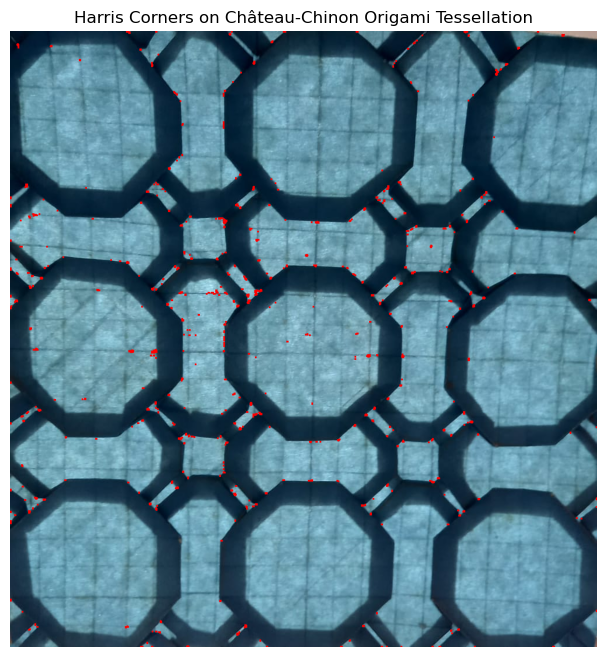

In [18]:
# The Harris Corner Detection Algorithm 

# Problem Statement :- Use Harris Corner Detection for detecting corner points in the image of a back-lit origami tessellation - Chateau Chinon

import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image of tessellation
img = cv2.imread("harris_algo_tessellation.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray =  np.float32(gray)

# Apply Harris corner detection
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.02)

# Dilate the corner detections to make them more visible
dst = cv2.dilate(dst, None)

# Threshold for marking the corners in red
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners on Château-Chinon Origami Tessellation')
plt.axis('off')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_4060\3492466402.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


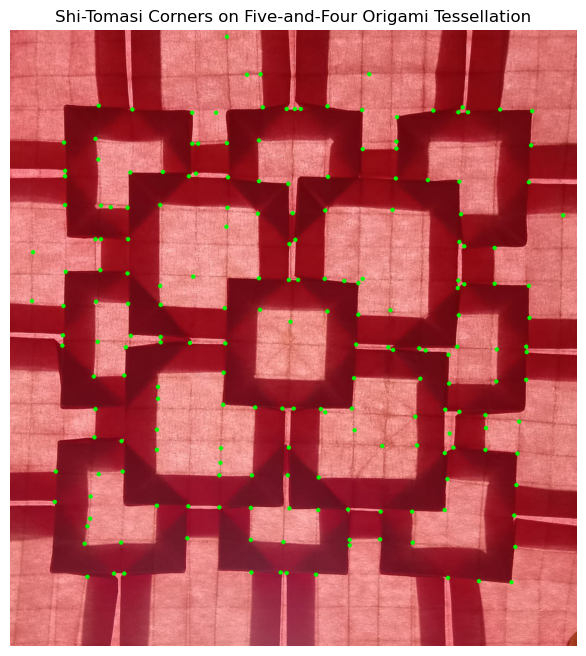

In [17]:
# The Shi-Tomasi Corner Detection Algorithm

# Problem Statement :- Use Shi-Tomasi Corner Detection for detecting corner points 
# in the image of a back-lit origami tessellation- modified version of the - "Five and Four"

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Five-and-Four origami tessellation image
img = cv2.imread("shi_tomasi_algo_tessellation.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=200, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw the corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# Show the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners on Five-and-Four Origami Tessellation')
plt.axis('off')
plt.show()

Good Matches Found: 33


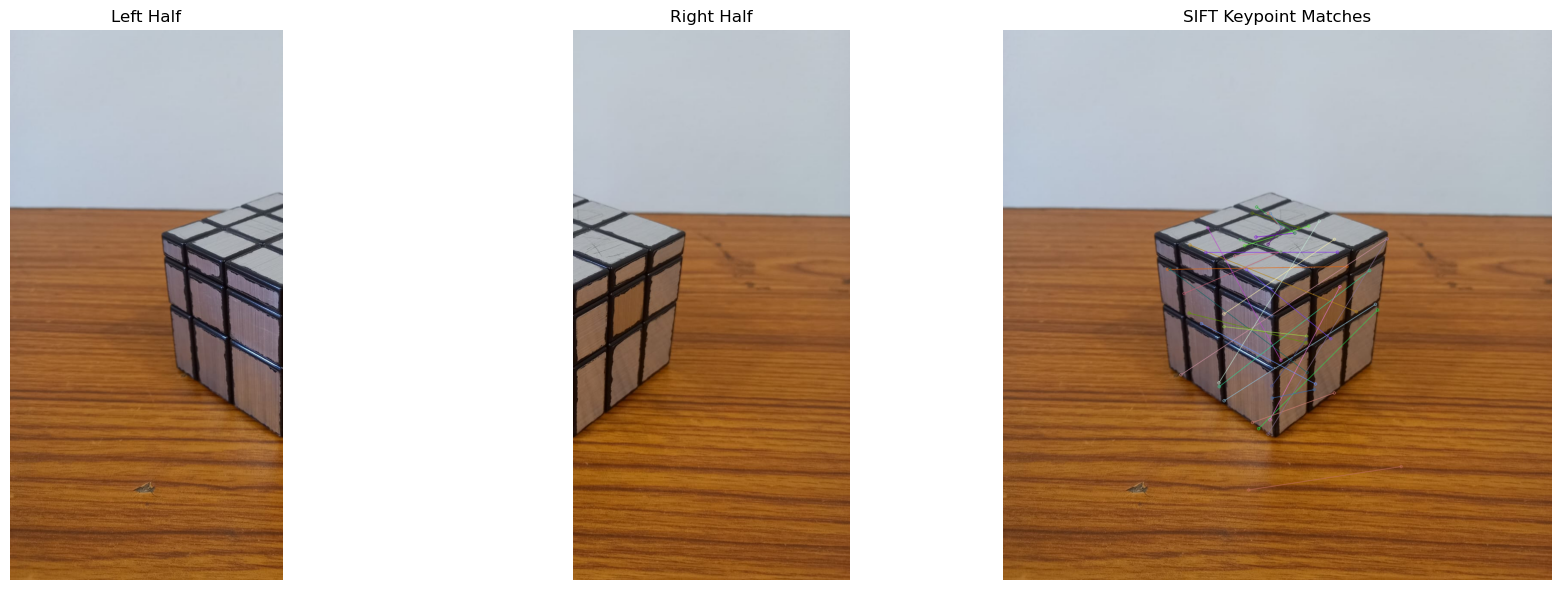

In [16]:
# SIFT algorithm usage 

# Problem Statement :- Use SIFT algorithm to find similarities between the 2 half-images of a mirror cube

import cv2
import matplotlib.pyplot as plt

# Load the left and right half images
img1 = cv2.imread('sift_algo_left_half_cube.jpg')
img2 = cv2.imread('sift_algo_right_half_cube.jpg')

# Check if both images loaded
if img1 is None or img2 is None:
    print("One of the images could not be loaded.")
else:
    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # Brute-Force Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    print(f"Good Matches Found: {len(good_matches)}")

    # Draw matched keypoints
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Plot all 3 images
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Left Half")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("Right Half")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title("SIFT Keypoint Matches")
    plt.axis("off")

    plt.tight_layout()
    plt.show()